# Mpg_project: 
## An analysis of vehicle fuel economy

- __Goal:__ to determine probable causes of improved fuel economy (increased MPG) of cars driven in the United States from 1970-1982.

- __Strategy__: clean/process data, analyze variable relationships/trends, and present findings.


> Dataset is sourced from [UC Irvine's Machine Learning Repo.](https://archive.ics.uci.edu/dataset/9/auto+mpg)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<center> 
    
### Variable descriptions: 

</center>

| **Variable**   | **Description**                                             |
| -------------- | ----------------------------------------------------------- |
| `mpg`          | Miles per gallon                                            |
| `cylinders`    | Chamber inside of engine which generate power               |
| `displacement` | Air displaced by pistons in cylinders; measure of cylinder volume |
| `horsepower`   | Unit of power                                               |
| `weight`       | In pounds                                                   |
| `acceleration` | 0-60MPH in seconds                                 |
| `model year`   | Year the car is manufactured                                |
| `origin`       | 1-USA, 2-Europe, 3-Asia                                     |
| `car name`     | Car model                                                   |


# 1. Clean/Process Data
* Check number of rows and duplicates.
Verify that datatypes are appropriate for our analysis.

In [2]:
df = pd.read_csv('autompg.csv')
df.dtypes
duplicates = df.duplicated()
number_of_duplicates = duplicates.sum()
print('Number of Observations/Rows:',len(df))
print(f"Number of Duplicate Rows: {number_of_duplicates}", "\n")
print(df.dtypes)

Number of Observations/Rows: 406
Number of Duplicate Rows: 0 

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object


### Datatype, NaN, Null validation
* Verify that datatypes are appropriate for our analysis; and check for NaN/NULLS.

In [3]:
df.isna()
missing_data = df.isna()
missing_per_row = missing_data.sum(axis=1)
print(df[missing_per_row > 0])
print('\n\n','**TOTAL COUNT OF NaNs:',sum(missing_per_row))

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
10    NaN          4         133.0       115.0    3090          17.5   
11    NaN          8         350.0       165.0    4142          11.5   
12    NaN          8         351.0       153.0    4034          11.0   
13    NaN          8         383.0       175.0    4166          10.5   
14    NaN          8         360.0       175.0    3850          11.0   
17    NaN          8         302.0       140.0    3353           8.0   
38   25.0          4          98.0         NaN    2046          19.0   
39    NaN          4          97.0        48.0    1978          20.0   
133  21.0          6         200.0         NaN    2875          17.0   
337  40.9          4          85.0         NaN    1835          17.3   
343  23.6          4         140.0         NaN    2905          14.3   
361  34.5          4         100.0         NaN    2320          15.8   
367   NaN          4         121.0       110.0    2800          

### Address NaN values
* 14 observations have NaN values, 6 of which are associated with 1970 cars. Let's see if removing these observations will affect our sample of 1970s cars. The remaining 8 NaN's are dispursed across 1971-1982 car models and will not affect data quality so we will simply remove them. 
* Let's compare the summary statistics of 1970s cars with the NaN Values and 1970s cars without NaN Values

In [4]:
df_1970cars = pd.read_csv('1970cars.csv')
print(df_1970cars[['cylinders','displacement','horsepower','weight','acceleration']].describe().round(2),'\n')

df_1970cars_RemovedNA = df_1970cars.dropna()
print(df_1970cars_RemovedNA[['cylinders','displacement','horsepower','weight','acceleration']].describe().round(2))

print('\n\n**STDDEV of both samples relatively unchanged, lets compare CVs as well')

       cylinders  displacement  horsepower   weight  acceleration
count      35.00         35.00       35.00    35.00         35.00
mean        6.86        286.86      148.86  3441.31         12.71
std         1.70        118.93       49.63   807.48          3.30
min         4.00         97.00       46.00  1835.00          8.00
25%         6.00        198.50       96.00  2723.00         10.00
50%         8.00        307.00      150.00  3504.00         12.00
75%         8.00        371.50      191.50  4154.00         15.00
max         8.00        455.00      225.00  4732.00         20.50 

       cylinders  displacement  horsepower   weight  acceleration
count      29.00         29.00       29.00    29.00         29.00
mean        6.76        281.41      147.83  3372.79         12.95
std         1.72        124.42       53.73   852.87          3.33
min         4.00         97.00       46.00  1835.00          8.00
25%         6.00        198.00       95.00  2648.00         10.00
50%     

* #### correlation variation percentages for each sample. 
_(STDDEV/MEAN)*100_

In [5]:
numeric_df = df_1970cars[['cylinders','displacement','horsepower','weight','acceleration']]
std = numeric_df.std()
mean = numeric_df.mean()
cv = std/mean
cv_percentage = cv*100
cv_df = pd.DataFrame([cv_percentage], index=['CV (With_NaN)   '])

numeric_df2 = df_1970cars_RemovedNA[['cylinders','displacement','horsepower','weight','acceleration']]
std2 = numeric_df2.std()
mean2 = numeric_df2.mean()
cv2 = std2/mean2
cv_percentage2 = cv2*100
cv_df2 = pd.DataFrame([cv_percentage2], index=['CV (Without_NaN)'])

print(cv_df.round(2),'\n')
print(cv_df2.round(2),'\n')
print('\n', '**Correlation variation percentages for both samples are similar. Proceed to remove NaNs as well as all other NaNs. \n 14 total removed.')

                  cylinders  displacement  horsepower  weight  acceleration
CV (With_NaN)         24.79         41.46       33.34   23.46         25.93 

                  cylinders  displacement  horsepower  weight  acceleration
CV (Without_NaN)      25.52         44.21       36.35   25.29         25.73 


 **Correlation variation percentages for both samples are similar. Proceed to remove NaNs as well as all other NaNs. 
 14 total removed.


In [6]:
#Cleaned dataset
df_cleaned = df.dropna()
print(df_cleaned)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
401  27.0          4         140.0        86.0    2790          15.6   
402  44.0          4          97.0        52.0    2130          24.6   
403  32.0          4         135.0        84.0    2295          11.6   
404  28.0          4         120.0        79.0    2625          18.6   
405  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                   car_name  
0            70       1  chevrolet chevelle malibu  
1            70       1      

# 2. Analyze Relationships and Trends

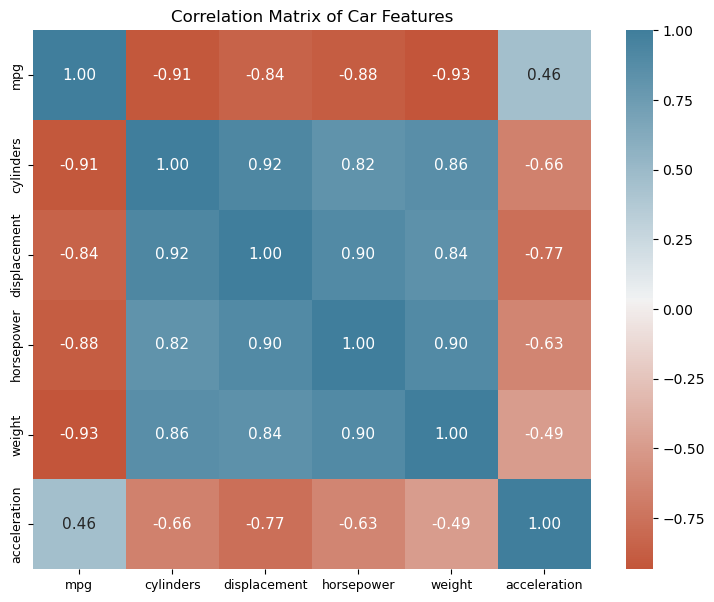

In [7]:
correlation_matrix = df_1970cars_RemovedNA[['mpg','cylinders','displacement','horsepower','weight','acceleration']].corr('pearson')
plt.figure(figsize=(9, 7))
cmap = sns.diverging_palette(20, 230, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, annot_kws={"size": 11})
plt.title('Correlation Matrix of Car Features')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

> __the correlation coefficients (r) for each square match up with what we might expect; and to our benefit, nearly all of these values strongly suggest a positive or negative relationship.__

* On the leftmost column, MPG has a strong negative relationship with cylinders, displacement, horsepower, and weight. This essentially means the more cylinders your car has the worse the MPG will be and vice versa. A 4-cylinder car (Toyota) will likely travel farther than an 8-cylinder car (Ferrari) on a single gallon of gas.

* On the cylinders column, displacement, horsepower, and weight all have a strong positive relationship with cylinders. This means that the more cylinders a vehicle has, the greater the horsepower, displacement (volume), and weight.

In [8]:
%%html
<div class='tableauPlaceholder' id='viz1699559312323' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;mp&#47;mpg1_16995592925340&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='mpg1_16995592925340&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;mp&#47;mpg1_16995592925340&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1699559312323');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='800px';vizElement.style.height='627px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='800px';vizElement.style.height='627px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>



__My guess is that you've already concluded that MPG has improved over time, and you'd be right! MPG is one of the most popular metrics that car brands use to convince you that their car is better. So it would be reasonable to think that car manufacturers focus their energy on improving fuel economy to sell more cars. But can we truly attribute technological innovation for the gains in MPG? No. Scroll down.__




In [9]:
%%html
<div class='tableauPlaceholder' id='viz1699559412789' style='position: relative'><noscript><a href='#'><img alt='Dashboard 2 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;mp&#47;mpg2_16995594047090&#47;Dashboard2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='mpg2_16995594047090&#47;Dashboard2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;mp&#47;mpg2_16995594047090&#47;Dashboard2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1699559412789');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='800px';vizElement.style.height='627px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='800px';vizElement.style.height='627px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

__The chart above shows us the types of cars Americans drove the most. Focusing our attention on just the 8 and 4 cylinder cars, we can see a shift towards 4 cylinder vehicles.__

__During the 1970s energy crisis, American consumers began to reduce their demand for energy-intensive goods. This shift in consumer behavior extended to the automotive sector. Initially, the automotive industry had no requirement to display fuel economy information (MPG) on vehicles. But in 1974, the Environmental Protection Agency introduced a mandate requiring fuel economy labels on all cars. These labels highlighted the fuel inefficiency of vehicles with more cylinders, potentially leading to the significant decline in the popularity of 8-cylinder vehicles that year. This change paved the way (pun intended) for the rise of 4-cylinder cars and the subsequent (inevitable, really) increase in market share for Asian car manufacturers in the United States.__

In [10]:
%%html
<div class='tableauPlaceholder' id='viz1699559803557' style='position: relative'><noscript><a href='#'><img alt='Dashboard 3 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;mp&#47;mpg3&#47;Dashboard3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='mpg3&#47;Dashboard3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;mp&#47;mpg3&#47;Dashboard3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1699559803557');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='800px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='800px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

__By looking at MPG over time of all types of cars, it may be prudent to credit technological advancement for improvement in fuel economy.__

__Observing the trendline of MPG overall and by group (alternating between 'All' and '4') suggests that innovation might not be the primary driver of improved fuel econonmy.__

__The sharp increase in fuel-effiency vehicles up to 1980 can be attributed to the phasing out of 8-cylinder vehicles, which previously lowered MPG. Additionally, The phasing out of 8-cylinder vehicles may also explain the downward trend in weight (8-cylinder cars weigh more).__

In [11]:
%%html
<div class='tableauPlaceholder' id='viz1699559899205' style='position: relative'><noscript><a href='#'><img alt='Dashboard 4 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;mp&#47;mpg4&#47;Dashboard4&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='mpg4&#47;Dashboard4' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;mp&#47;mpg4&#47;Dashboard4&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1699559899205');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='800px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='800px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

__As 4-cylinder vehicles become the preferred choice, it may be worth examining whether manufacturers improved fuel efficiency during this shift. Let's investigate displacement. According to the graph above, displacement levels in 4-cylinders have remained the same; there does not seem to be significant changes in displacement.__

# 3. Findings and Conclusion

### - Holding cylinders constant, the dataset provides no variables that significantly explains the improvement in MPG over time.

### - Overall improvement in miles per gallon was particularly notable due to the exclusion of 8-cylinder vehicles from the calculation.

*rise of asia car manufacturers may be worth considering as subsequent analysis.*

